In [4]:
pip install berserk

  Using cached berserk-0.10.0-py2.py3-none-any.whl (21 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached ndjson-0.3.1-py2.py3-none-any.whl (5.3 kB)
  Using cached wrapt-1.14.1-cp310-cp310-macosx_11_0_arm64.whl (35 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))


In [2]:
import berserk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
f = open("lichess.txt", "r")
token = (f.read())
token = token.strip()
session = berserk.TokenSession(token)
client = berserk.Client (session=session)

In [4]:
client.account.get()

{'id': 'brechner',
 'username': 'Brechner',
 'perfs': {'blitz': {'games': 1512, 'rating': 1606, 'rd': 45, 'prog': 0},
  'puzzle': {'games': 3, 'rating': 1647, 'rd': 309, 'prog': 0, 'prov': True},
  'bullet': {'games': 9, 'rating': 1223, 'rd': 152, 'prog': 0, 'prov': True},
  'correspondence': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'classical': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'rapid': {'games': 0, 'rating': 1500, 'rd': 500, 'prog': 0, 'prov': True}},
 'createdAt': datetime.datetime(2019, 1, 20, 11, 46, 42, 448000, tzinfo=datetime.timezone.utc),
 'online': False,
 'seenAt': datetime.datetime(2022, 10, 12, 6, 4, 3, 399000, tzinfo=datetime.timezone.utc),
 'playTime': {'total': 336613, 'tv': 0},
 'url': 'https://lichess.org/@/Brechner',
 'count': {'all': 1522,
  'rated': 1521,
  'ai': 0,
  'draw': 68,
  'drawH': 68,
  'loss': 731,
  'lossH': 731,
  'win': 723,
  'winH': 723,
  'bookmark': 0,
  'playing'

In [5]:
me = client.users.get_rating_history('Brechner')

In [6]:
print(me[1])

{'name': 'Blitz', 'points': [Entry(year=2021, month=6, day=28, rating=1210), Entry(year=2021, month=6, day=29, rating=1454), Entry(year=2021, month=6, day=30, rating=1572), Entry(year=2021, month=6, day=31, rating=1556), Entry(year=2021, month=7, day=1, rating=1614), Entry(year=2021, month=7, day=2, rating=1613), Entry(year=2021, month=7, day=3, rating=1627), Entry(year=2021, month=7, day=4, rating=1649), Entry(year=2021, month=7, day=6, rating=1692), Entry(year=2021, month=7, day=7, rating=1683), Entry(year=2021, month=7, day=14, rating=1661), Entry(year=2021, month=7, day=15, rating=1660), Entry(year=2021, month=7, day=16, rating=1620), Entry(year=2021, month=7, day=17, rating=1640), Entry(year=2021, month=7, day=18, rating=1638), Entry(year=2021, month=7, day=19, rating=1659), Entry(year=2021, month=7, day=20, rating=1608), Entry(year=2021, month=7, day=21, rating=1611), Entry(year=2021, month=7, day=22, rating=1634), Entry(year=2021, month=7, day=23, rating=1629), Entry(year=2021, 

In [7]:
me = client.users.get_rating_history('Brechner')
df = pd.DataFrame(me[1])
df.head(-5)

,name,points
0,Blitz,"(2021, 6, 28, 1210)"
1,Blitz,"(2021, 6, 29, 1454)"
2,Blitz,"(2021, 6, 30, 1572)"
3,Blitz,"(2021, 6, 31, 1556)"
4,Blitz,"(2021, 7, 1, 1614)"
...,...,...
327,Blitz,"(2022, 8, 30, 1624)"
328,Blitz,"(2022, 9, 1, 1623)"
329,Blitz,"(2022, 9, 2, 1616)"
330,Blitz,"(2022, 9, 4, 1612)"


In [8]:
df.get(["points"])


,points
0,"(2021, 6, 28, 1210)"
1,"(2021, 6, 29, 1454)"
2,"(2021, 6, 30, 1572)"
3,"(2021, 6, 31, 1556)"
4,"(2021, 7, 1, 1614)"
...,...
332,"(2022, 9, 7, 1593)"
333,"(2022, 9, 8, 1599)"
334,"(2022, 9, 10, 1612)"
335,"(2022, 9, 11, 1613)"


In [9]:
df_new = pd.DataFrame(df['points'].to_list(),columns=['year','month','day','rating'])


In [10]:
print(df_new)

     year  month  day  rating
0    2021      6   28    1210
1    2021      6   29    1454
2    2021      6   30    1572
3    2021      6   31    1556
4    2021      7    1    1614
..    ...    ...  ...     ...
332  2022      9    7    1593
333  2022      9    8    1599
334  2022      9   10    1612
335  2022      9   11    1613
336  2022      9   12    1606

[337 rows x 4 columns]


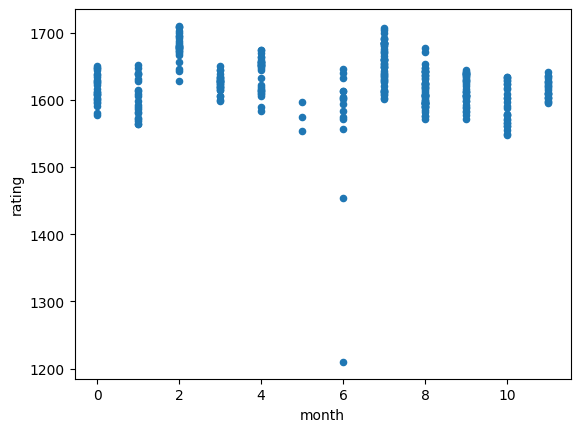

In [11]:

df_new = pd.DataFrame(df['points'].to_list(),columns=['year','month','day','rating'])

df_new.plot(kind = 'scatter', x = 'month', y = 'rating')

plt.show()

In [12]:
df_new1 = df_new.sort_values(by = 'rating')
df_new1

,year,month,day,rating
0,2021,6,28,1210
1,2021,6,29,1454
87,2021,10,4,1547
88,2021,10,5,1549
265,2022,5,8,1554
...,...,...,...,...
296,2022,7,23,1704
292,2022,7,19,1707
198,2022,2,22,1708
195,2022,2,18,1709


In [13]:
df_new.describe()

,year,month,day,rating
count,337.000000,337.000000,337.000000,337.000000
mean,2021.605341,5.919881,15.768546,1623.563798
std,0.489504,3.375700,9.022450,41.387860
min,2021.000000,0.000000,1.000000,1210.000000
25%,2021.000000,3.000000,8.000000,1602.000000
50%,2022.000000,7.000000,16.000000,1623.000000
75%,2022.000000,9.000000,24.000000,1645.000000
max,2022.000000,11.000000,31.000000,1710.000000


In [14]:
new_array = np.array(df_new)
new_array

array([[2021,    6,   28, 1210],
       [2021,    6,   29, 1454],
       [2021,    6,   30, 1572],
       ...,
       [2022,    9,   10, 1612],
       [2022,    9,   11, 1613],
       [2022,    9,   12, 1606]])

In [15]:
new_array.shape

(337, 4)